Arvid Lundervold, 2025-01-14

[![Google Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/MMIV-ML/BMED365-2025/blob/main/Lab2-DL/notebooks/01-MNIST-Classification-with-MLP.ipynb)

### NB 2: MNIST Classification using Multilayer Perceptron (MLP)

In [1]:
# This is a quick check of whether the notebook is currently running on Google Colaboratory
# as that makes some difference for the code below.
# We'll do this in every notebook of the course.

try:
    import google.colab
    # If this statement executes without error, you're in a Colab environment.
    is_colab = True
    print("Running in Google Colab.")
except ImportError:
    # An ImportError means you're not in a Colab environment.
    is_colab = False
    print("Not running in Google Colab.")

Not running in Google Colab.


Loading MNIST data from CSV...
Training MLP classifier...
Iteration 1, loss = 1.80219263
Iteration 2, loss = 0.83062007
Iteration 3, loss = 0.47901967
Iteration 4, loss = 0.36081992
Iteration 5, loss = 0.29609698
Iteration 6, loss = 0.26299943
Iteration 7, loss = 0.22654318
Iteration 8, loss = 0.19963748
Iteration 9, loss = 0.17621385
Iteration 10, loss = 0.15541464
Iteration 11, loss = 0.13777052
Iteration 12, loss = 0.12254602
Iteration 13, loss = 0.10987930
Iteration 14, loss = 0.09904595
Iteration 15, loss = 0.08934850
Iteration 16, loss = 0.08127489
Iteration 17, loss = 0.07005026
Iteration 18, loss = 0.06388499
Iteration 19, loss = 0.05577347
Iteration 20, loss = 0.05218208
Iteration 21, loss = 0.04850333
Iteration 22, loss = 0.04370516
Iteration 23, loss = 0.03838298
Iteration 24, loss = 0.03219631
Iteration 25, loss = 0.02917972
Iteration 26, loss = 0.02770529
Iteration 27, loss = 0.02415353
Iteration 28, loss = 0.02149856
Iteration 29, loss = 0.01950017
Iteration 30, loss = 0.

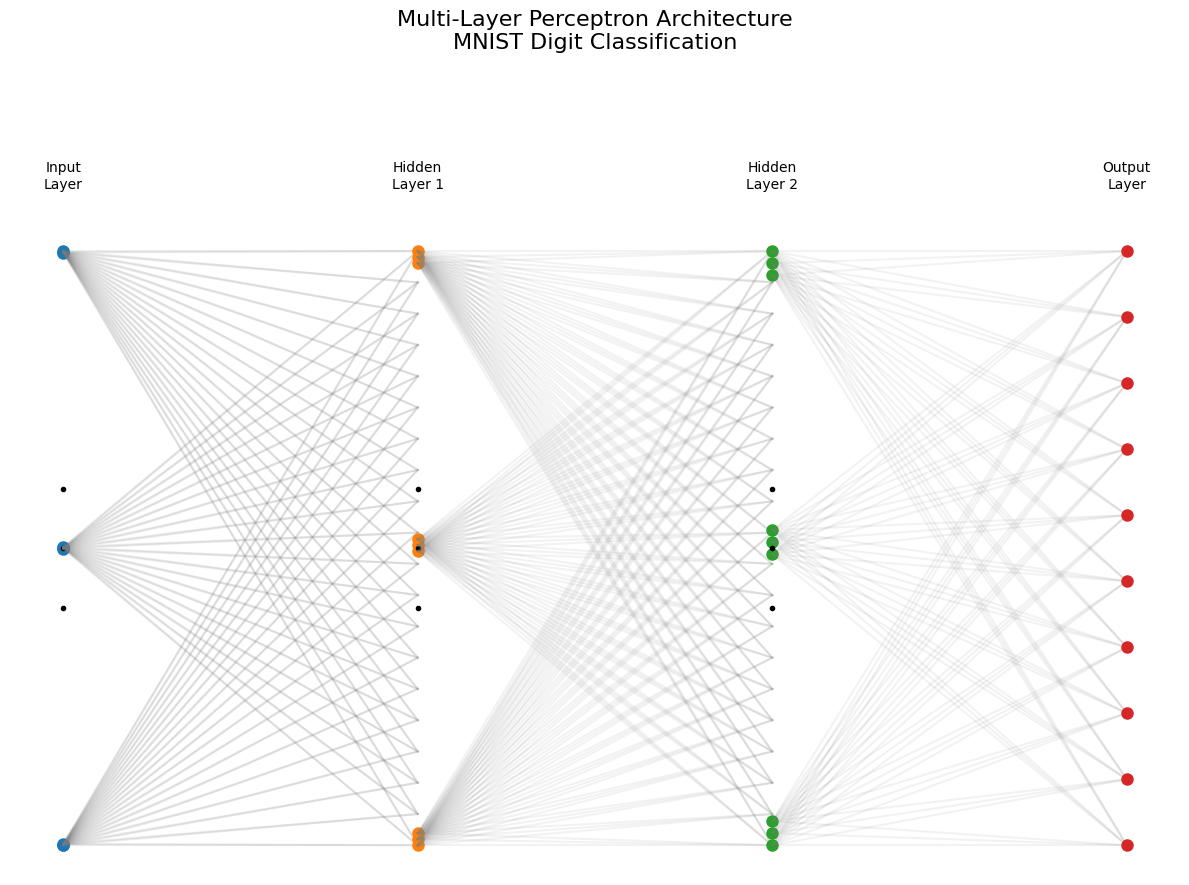


MLP Architecture Summary:
-------------------------
Input Layer:     784 neurons (28x28 pixel images)
Hidden Layer 1:  100 neurons (ReLU activation)
Hidden Layer 2:   50 neurons (ReLU activation)
Output Layer:     10 neurons (Softmax activation)

Total parameters: 84,060
Breakdown:
- Input → Hidden1:  78,500 parameters
- Hidden1 → Hidden2: 5,050 parameters
- Hidden2 → Output:  510 parameters

Evaluating model performance...

Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.99      0.97        94
           1       0.97      0.97      0.97       113
           2       0.91      0.94      0.92       110
           3       0.92      0.89      0.90       117
           4       0.92      0.92      0.92        85
           5       0.95      0.91      0.93       103
           6       0.94      0.98      0.96        92
           7       0.94      0.97      0.95        97
           8       0.92      0.90      0.91       103
      

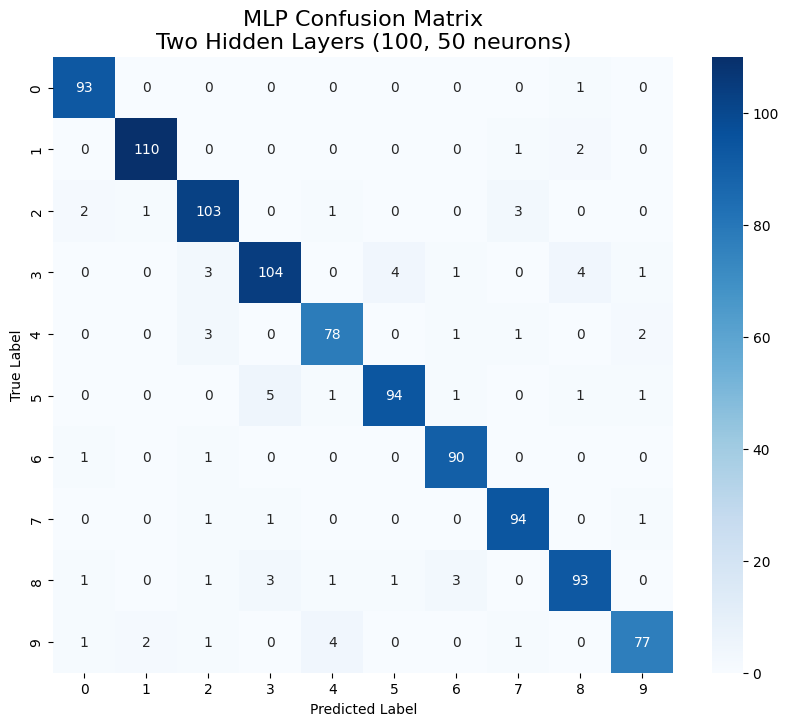


Performance Metrics:
Accuracy: 0.936

Per-class metrics:

Digit 0:
Precision: 0.949
Recall: 0.989
F1-score: 0.969

Digit 1:
Precision: 0.973
Recall: 0.973
F1-score: 0.973

Digit 2:
Precision: 0.912
Recall: 0.936
F1-score: 0.924

Digit 3:
Precision: 0.920
Recall: 0.889
F1-score: 0.904

Digit 4:
Precision: 0.918
Recall: 0.918
F1-score: 0.918

Digit 5:
Precision: 0.949
Recall: 0.913
F1-score: 0.931

Digit 6:
Precision: 0.938
Recall: 0.978
F1-score: 0.957

Digit 7:
Precision: 0.940
Recall: 0.969
F1-score: 0.954

Digit 8:
Precision: 0.921
Recall: 0.903
F1-score: 0.912

Digit 9:
Precision: 0.939
Recall: 0.895
F1-score: 0.917


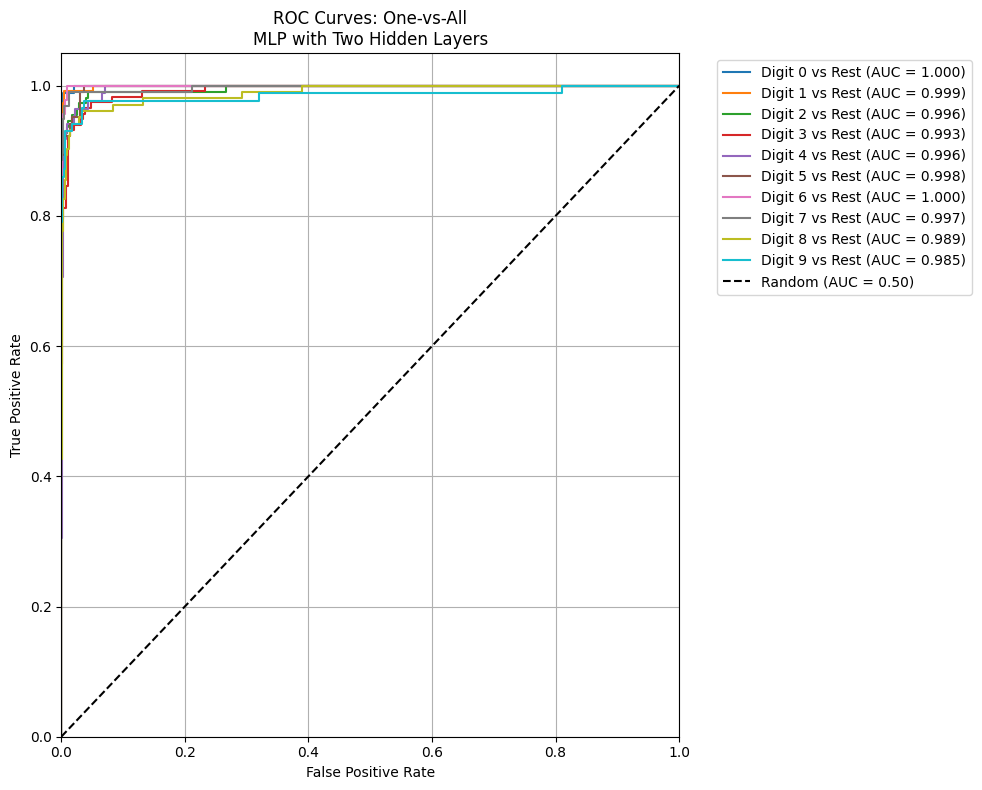

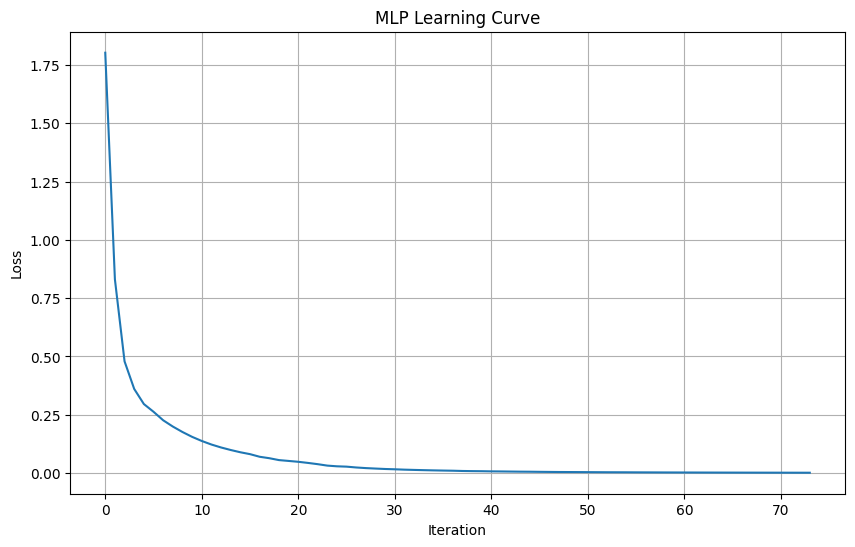

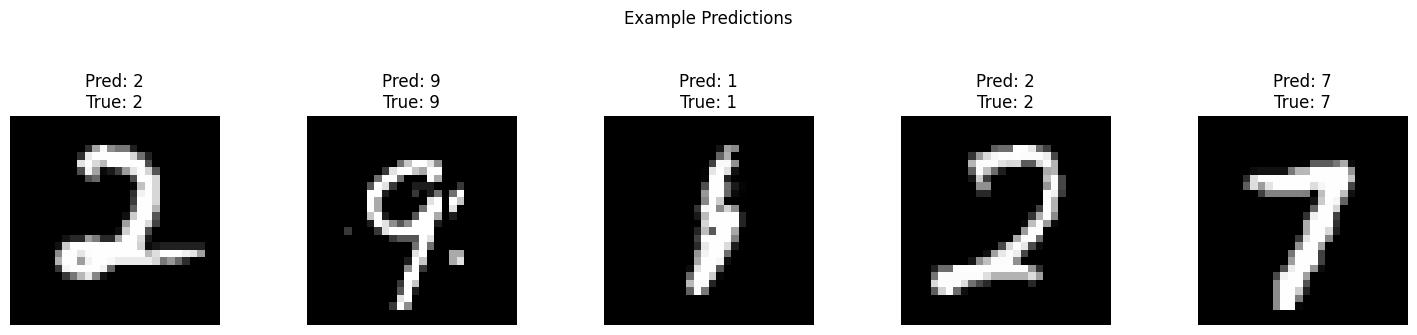


Model saved as 'mnist_images/mnist_mlp_classifier.joblib'


In [2]:
# NB 2: MNIST Classification using Multi-Layer Perceptron (MLP)

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import (
    confusion_matrix, 
    classification_report,
    accuracy_score, 
    precision_score, 
    recall_score, 
    f1_score,
    roc_curve, 
    auc
)
from sklearn.preprocessing import label_binarize
import seaborn as sns

# 1. Data Loading and Preprocessing (same as before)
print("Loading MNIST data from CSV...")
mnist_data = pd.read_csv('mnist_images/mnist_data_5000x785.csv')

# Split into training and test data
train_data, test_data = train_test_split(mnist_data, test_size=0.2, random_state=42)

X_train = train_data.drop('label', axis=1)
y_train = train_data['label']
X_test = test_data.drop('label', axis=1)
y_test = test_data['label']

# 2. Create and Train MLP
# Based on the image: input_layer_size=784, two hidden layers, output_layer_size=10
print("Training MLP classifier...")
mlp_classifier = MLPClassifier(
    hidden_layer_sizes=(100, 50),  # Two hidden layers with 100 and 50 neurons
    activation='relu',
    solver='adam',
    max_iter=300,
    random_state=42,
    verbose=True
)
mlp_classifier.fit(X_train, y_train)

# Plot the architecture
def plot_mlp_architecture():
    """Plot MLP architecture with input layer (784), two hidden layers (100, 50), and output layer (10)"""
    
    # Set up the figure
    plt.figure(figsize=(12, 8))
    
    # Layer sizes
    layer_sizes = [784, 100, 50, 10]
    layer_names = ['Input\nLayer', 'Hidden\nLayer 1', 'Hidden\nLayer 2', 'Output\nLayer']
    
    # Positions for each layer
    x_positions = np.linspace(0, 1, len(layer_sizes))
    max_neurons = max(layer_sizes)
    
    # Plot neurons for each layer
    for i, (size, name) in enumerate(zip(layer_sizes, layer_names)):
        # Calculate y positions for neurons in this layer
        y_positions = np.linspace(0, 1, size)
        
        # Plot neurons
        if size > 20:  # For large layers, just plot some representative neurons
            indices = np.concatenate([np.arange(3), 
                                   [size//2-1, size//2, size//2+1],
                                   np.arange(size-3, size)])
            y_positions = y_positions[indices]
            plt.plot([x_positions[i]]*len(y_positions), y_positions, 'o', 
                    markersize=8, label=f'{size} neurons')
            # Add dots to indicate skipped neurons
            plt.plot(x_positions[i], 0.4, '.k')
            plt.plot(x_positions[i], 0.5, '.k')
            plt.plot(x_positions[i], 0.6, '.k')
        else:
            plt.plot([x_positions[i]]*len(y_positions), y_positions, 'o', 
                    markersize=8, label=f'{size} neurons')
        
        # Add layer name
        plt.text(x_positions[i], 1.1, name, ha='center', va='bottom')
        
        # Draw connections to next layer
        if i < len(layer_sizes) - 1:
            next_size = min(len(np.linspace(0, 1, layer_sizes[i+1])), 20)
            next_y = np.linspace(0, 1, next_size)
            for y1 in y_positions:
                for y2 in next_y:
                    plt.plot([x_positions[i], x_positions[i+1]], [y1, y2], 
                            'gray', alpha=0.1)
    
    # Customize the plot
    plt.suptitle('Multi-Layer Perceptron Architecture\nMNIST Digit Classification', 
               y=1.1, fontsize=16)
   
    plt.axis('off')
    plt.tight_layout()
    plt.show()

# Display the architecture
plot_mlp_architecture()

# Print architecture summary
print("\nMLP Architecture Summary:")
print("-------------------------")
print("Input Layer:     784 neurons (28x28 pixel images)")
print("Hidden Layer 1:  100 neurons (ReLU activation)")
print("Hidden Layer 2:   50 neurons (ReLU activation)")
print("Output Layer:     10 neurons (Softmax activation)")

# Calculate total parameters
params_layer1 = 784 * 100 + 100  # weights + biases for first hidden layer
params_layer2 = 100 * 50 + 50    # weights + biases for second hidden layer
params_output = 50 * 10 + 10     # weights + biases for output layer
total_params = params_layer1 + params_layer2 + params_output

print(f"\nTotal parameters: {total_params:,}")
print("Breakdown:")
print(f"- Input → Hidden1:  {params_layer1:,} parameters")
print(f"- Hidden1 → Hidden2: {params_layer2:,} parameters")
print(f"- Hidden2 → Output:  {params_output:,} parameters")



# 3. Model Evaluation
print("\nEvaluating model performance...")
y_pred = mlp_classifier.predict(X_test)
y_prob = mlp_classifier.predict_proba(X_test)

# Print classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Plot confusion matrix
plt.figure(figsize=(10, 8))
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('MLP Confusion Matrix\nTwo Hidden Layers (100, 50 neurons)', fontsize=16)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

# Calculate and display metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average=None)
recall = recall_score(y_test, y_pred, average=None)
f1 = f1_score(y_test, y_pred, average=None)

print("\nPerformance Metrics:")
print(f"Accuracy: {accuracy:.3f}")
print("\nPer-class metrics:")
for digit in range(10):
    print(f"\nDigit {digit}:")
    print(f"Precision: {precision[digit]:.3f}")
    print(f"Recall: {recall[digit]:.3f}")
    print(f"F1-score: {f1[digit]:.3f}")

# Plot ROC curves
y_test_bin = label_binarize(y_test, classes=range(10))
fpr = dict()
tpr = dict()
roc_auc = dict()

plt.figure(figsize=(10, 8))
for digit in range(10):
    fpr[digit], tpr[digit], _ = roc_curve(y_test_bin[:, digit], y_prob[:, digit])
    roc_auc[digit] = auc(fpr[digit], tpr[digit])
    plt.plot(fpr[digit], tpr[digit],
             label=f'Digit {digit} vs Rest (AUC = {roc_auc[digit]:.3f})')

plt.plot([0, 1], [0, 1], 'k--', label='Random (AUC = 0.50)')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves: One-vs-All\nMLP with Two Hidden Layers')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.tight_layout()
plt.show()

# 4. Learning Curves
plt.figure(figsize=(10, 6))
plt.plot(mlp_classifier.loss_curve_)
plt.title('MLP Learning Curve')
plt.xlabel('Iteration')
plt.ylabel('Loss')
plt.grid(True)
plt.show()

# 5. Example Predictions
n_examples = 5
example_indices = np.random.randint(0, len(X_test), n_examples)

plt.figure(figsize=(15, 3))
for i, idx in enumerate(example_indices):
    plt.subplot(1, 5, i+1)
    img = X_test.iloc[idx].values.reshape(28, 28)
    plt.imshow(img, cmap='gray', vmin=0, vmax=1)
    plt.axis('off')
    pred = y_pred[idx]
    true = y_test.iloc[idx]
    plt.title(f'Pred: {pred}\nTrue: {true}')
plt.suptitle('Example Predictions', y=1.1)
plt.tight_layout()
plt.show()

# Save the model
import joblib
joblib.dump(mlp_classifier, 'mnist_images/mnist_mlp_classifier.joblib')
print("\nModel saved as 'mnist_images/mnist_mlp_classifier.joblib'")